# Income Qualification Project (Machine Learning using Python)

# Project Objective:
Identify the level of income qualification needed for the families in Latin America

# Problem Statement Scenario:
Many social programs have a hard time making sure the right people are given enough aid. It’s tricky when a program focuses on the poorest segment of the population. This segment of population can’t provide the necessary income and expense records to prove that they qualify. In Latin America, a popular method called Proxy Means Test (PMT) uses an algorithm to verify income qualification. With PMT, agencies use a model that considers a family’s observable household attributes like the material of their walls and ceiling or the assets found in their homes to classify them and predict their level of need. While this is an improvement, accuracy remains a problem as the region’s population grows and poverty declines. The Inter-American Development Bank (IDB)believes that new methods beyond traditional econometrics, based on a dataset of Costa Rican household characteristics, might help improve PMT’s performance.

In [1]:
import numpy as np 
import pandas as pd
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
%matplotlib inline
import collections
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# Q1. Identify the output variable

In [2]:
df_train=pd.read_csv('D:/Simplilearn/Machine Learning/Project_Income/train.csv')
df_test=pd.read_csv('D:/Simplilearn/Machine Learning/Project_Income/test.csv')

In [3]:
print(df_train.head())
print()
print(df_test.head())

             Id      v2a1  hacdor  rooms  hacapo  v14a  refrig  v18q  v18q1  \
0  ID_279628684  190000.0       0      3       0     1       1     0    NaN   
1  ID_f29eb3ddd  135000.0       0      4       0     1       1     1    1.0   
2  ID_68de51c94       NaN       0      8       0     1       1     0    NaN   
3  ID_d671db89c  180000.0       0      5       0     1       1     1    1.0   
4  ID_d56d6f5f5  180000.0       0      5       0     1       1     1    1.0   

   r4h1  ...  SQBescolari  SQBage  SQBhogar_total  SQBedjefe  SQBhogar_nin  \
0     0  ...          100    1849               1        100             0   
1     0  ...          144    4489               1        144             0   
2     0  ...          121    8464               1          0             0   
3     0  ...           81     289              16        121             4   
4     0  ...          121    1369              16        121             4   

   SQBovercrowding  SQBdependency  SQBmeaned  agesq  Tar

Target column is not present in the Test data set hence this is the "Target" column is our Target for supervised Learning.

In [4]:
print(df_train.Target.unique())

[4 2 3 1]


There are 4 unique values in the target column. This is a Supervised Learning - Classification problem set

# Q2 - Understand the type of data

In [5]:
print('Train Data Shape',df_train.shape)
print('Test Data Shape',df_test.shape)

Train Data Shape (9557, 143)
Test Data Shape (23856, 142)


In [6]:
print(df_train.dtypes.value_counts())
print(df_train.info())

int64      130
float64      8
object       5
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB
None


In [7]:
df_train.describe()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,2.697000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,2215.000000,9557.000000,9557.000000,...,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000
mean,1.652316e+05,0.038087,4.955530,0.023648,0.994768,0.957623,0.231767,1.404063,0.385895,1.559171,...,74.222769,1643.774302,19.132887,53.500262,3.844826,3.249485,3.900409,102.588867,1643.774302,3.302292
std,1.504571e+05,0.191417,1.468381,0.151957,0.072145,0.201459,0.421983,0.763131,0.680779,1.036574,...,76.777549,1741.197050,18.751395,78.445804,6.946296,4.129547,12.511831,93.516890,1741.197050,1.009565
min,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,1.000000
25%,8.000000e+04,0.000000,4.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,16.000000,289.000000,9.000000,0.000000,0.000000,1.000000,0.111111,36.000000,289.000000,3.000000
50%,1.300000e+05,0.000000,5.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,36.000000,961.000000,16.000000,36.000000,1.000000,2.250000,0.444444,81.000000,961.000000,4.000000
75%,2.000000e+05,0.000000,6.000000,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000,2.000000,...,121.000000,2601.000000,25.000000,81.000000,4.000000,4.000000,1.777778,134.560010,2601.000000,4.000000
max,2.353477e+06,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,6.000000,5.000000,8.000000,...,441.000000,9409.000000,169.000000,441.000000,81.000000,36.000000,64.000000,1369.000000,9409.000000,4.000000


In [8]:
print('Integer Type: ')
print(df_train.select_dtypes(np.int64).columns)
print('\n')
print('Float Type: ')
print(df_train.select_dtypes(np.float64).columns)
print('\n')
print('Object Type: ')
print(df_train.select_dtypes(np.object).columns)

Integer Type: 
Index(['hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q', 'r4h1', 'r4h2',
       'r4h3', 'r4m1',
       ...
       'area1', 'area2', 'age', 'SQBescolari', 'SQBage', 'SQBhogar_total',
       'SQBedjefe', 'SQBhogar_nin', 'agesq', 'Target'],
      dtype='object', length=130)


Float Type: 
Index(['v2a1', 'v18q1', 'rez_esc', 'meaneduc', 'overcrowding',
       'SQBovercrowding', 'SQBdependency', 'SQBmeaned'],
      dtype='object')


Object Type: 
Index(['Id', 'idhogar', 'dependency', 'edjefe', 'edjefa'], dtype='object')


There are 138 numeric columns & 5 categorical columns.

# Q3. Check if there are any biases in your dataset.

<AxesSubplot:>

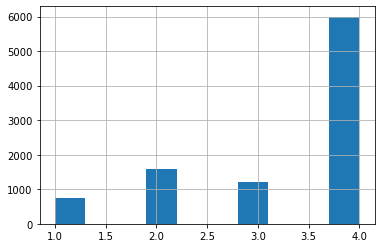

In [9]:
df_train['Target'].hist()

The dataset is biased since extreme poverty has the smallest count in the train dataset. 

# Q4. Check whether all members of the house have the same poverty level.

In [10]:
unique_values = df_train.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)
household = unique_values[unique_values != True]
print('There are {} such households where the family member donot have the same target.'.format((household.count())))

There are 85 such households where the family member donot have the same target.


# Q5. Check if there is a house without a family head.

In [11]:
house_head = df_train.groupby('idhogar')['parentesco1'].sum()
no_head = house_head.loc[house_head == 0]
no_head.count()
print('There are {} households without a Head Member'.format(no_head.count()))

There are 15 households without a Head Member


# Q6. Set poverty level of the members and the head of the house within a family.

In [12]:
target_mean=df_train.groupby('idhogar')['Target'].mean().astype('int64').reset_index().rename(columns={'Target':'Target_mean'})
df_train=df_train.merge(target_mean,how='left',on='idhogar')
df_train.Target=df_train.Target_mean
df_train.drop('Target_mean',axis=1,inplace=True)
df_train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


# Q7. Count how many null values are existing in columns.

In [13]:
nullcol_train=df_train.columns[df_train.isnull().any()]
df_train[nullcol_train].isnull().sum()

v2a1         6860
v18q1        7342
rez_esc      7928
meaneduc        5
SQBmeaned       5
dtype: int64

In [14]:
nullcol_test=df_test.columns[df_test.isnull().any()]
df_test[nullcol_test].isnull().sum()

v2a1         17403
v18q1        18126
rez_esc      19653
meaneduc        31
SQBmeaned       31
dtype: int64

In [15]:
print ('Train null value % in v2a1 : ', df_train['v2a1'].isnull().sum()/df_train.shape[0]*100)
print ('Train null value % in v18q1 : ', df_train['v18q1'].isnull().sum()/df_train.shape[0]*100)
print ('Train null value % in rez_esc : ', df_train['rez_esc'].isnull().sum()/df_train.shape[0]*100)
print ('Train null value % in meaneduc : ', df_train['meaneduc'].isnull().sum()/df_train.shape[0]*100)
print ('Train null value % in SQBmeaned : ', df_train['SQBmeaned'].isnull().sum()/df_train.shape[0]*100)

Train null value % in v2a1 :  71.7798472323951
Train null value % in v18q1 :  76.82327090091033
Train null value % in rez_esc :  82.95490216595167
Train null value % in meaneduc :  0.05231767290990897
Train null value % in SQBmeaned :  0.05231767290990897


More than 50% of the data is missing in 'v2a1', 'v18q1', 'rez_esc'. Therefore we can drop these columns

In [16]:
df_train=df_train.drop(['v2a1','v18q1','rez_esc'],axis=1) 
print('Train Dataset Shape :',df_train.shape)
df_test=df_test.drop(['v2a1','v18q1','rez_esc'],axis=1) 
print('Test Dataset Shape :',df_test.shape)

Train Dataset Shape : (9557, 140)
Test Dataset Shape : (23856, 139)


In [17]:
df_train.describe()

,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,r4m1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,...,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000
mean,0.038087,4.955530,0.023648,0.994768,0.957623,0.231767,0.385895,1.559171,1.945066,0.399184,...,74.222769,1643.774302,19.132887,53.500262,3.844826,3.249485,3.900409,102.588867,1643.774302,3.280318
std,0.191417,1.468381,0.151957,0.072145,0.201459,0.421983,0.680779,1.036574,1.188852,0.692460,...,76.777549,1741.197050,18.751395,78.445804,6.946296,4.129547,12.511831,93.516890,1741.197050,1.034464
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,16.000000,289.000000,9.000000,0.000000,0.000000,1.000000,0.111111,36.000000,289.000000,2.000000
50%,0.000000,5.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.000000,0.000000,...,36.000000,961.000000,16.000000,36.000000,1.000000,2.250000,0.444444,81.000000,961.000000,4.000000
75%,0.000000,6.000000,0.000000,1.000000,1.000000,0.000000,1.000000,2.000000,3.000000,1.000000,...,121.000000,2601.000000,25.000000,81.000000,4.000000,4.000000,1.777778,134.560010,2601.000000,4.000000
max,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,5.000000,8.000000,8.000000,6.000000,...,441.000000,9409.000000,169.000000,441.000000,81.000000,36.000000,64.000000,1369.000000,9409.000000,4.000000


In [18]:
df_test.describe()

,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,r4m1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
count,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,...,23856.000000,23856.00000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23825.000000,23856.000000
mean,0.050679,4.955776,0.028421,0.992748,0.961603,0.240191,0.416541,1.563967,1.980508,0.389168,...,34.454183,74.44974,1657.798080,19.113389,54.087232,3.885480,3.564751,4.171669,100.509220,1657.798080
std,0.219346,1.539753,0.166174,0.084850,0.192157,0.427208,0.713255,0.990171,1.171626,0.677171,...,21.696245,76.99701,1753.603406,17.314597,77.312255,6.878967,6.668757,13.105989,89.211063,1753.603406
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.020408,0.000000,0.000000,0.000000
25%,0.000000,4.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,16.000000,16.00000,256.000000,9.000000,0.000000,0.000000,1.000000,0.111111,36.000000,256.000000
50%,0.000000,5.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.000000,0.000000,...,32.000000,36.00000,1024.000000,16.000000,36.000000,1.000000,2.250000,0.444444,75.111115,1024.000000
75%,0.000000,6.000000,0.000000,1.000000,1.000000,0.000000,1.000000,2.000000,3.000000,1.000000,...,51.000000,121.00000,2601.000000,25.000000,81.000000,4.000000,4.000000,1.777778,132.250000,2601.000000
max,1.000000,15.000000,1.000000,1.000000,1.000000,1.000000,6.000000,7.000000,7.000000,5.000000,...,97.000000,441.00000,9409.000000,169.000000,441.000000,100.000000,169.000000,64.000000,1296.000000,9409.000000


# Q8. Remove null value rows of the target variable.

In [19]:
#print(df_train['meaneduc'].dtypes)
#print(df_train['SQBmeaned'].dtypes)
df_train['meaneduc'].fillna(df_train['meaneduc'].mean(),inplace=True)
df_test['meaneduc'].fillna(df_test['meaneduc'].mean(),inplace=True)
df_train['SQBmeaned'].fillna(df_train['SQBmeaned'].mean(), inplace=True)
df_test['SQBmeaned'].fillna(df_test['SQBmeaned'].mean(), inplace=True)

In [20]:
nullcol_train=df_train.columns[df_train.isnull().any()]
df_train[nullcol_train].isnull().sum()

Series([], dtype: float64)

In [21]:
nullcol_test=df_test.columns[df_test.isnull().any()]
df_test[nullcol_test].isnull().sum()

Series([], dtype: float64)

No null values in the Test and Train Datasets. 

# Q9. Predict the accuracy using random forest classifier.

In [22]:
df_train_new= df_train.drop(['Id'],axis=1)
df_train_new.describe(include='O')

,idhogar,dependency,edjefe,edjefa
count,9557,9557,9557,9557
unique,2988,31,22,22
top,fd8a6d014,yes,no,no
freq,13,2192,3762,6230


In [23]:
df_test_new= df_test.drop(['Id'],axis=1)
df_test_new.describe(include='O')

,idhogar,dependency,edjefe,edjefa
count,23856,23856,23856,23856
unique,7352,35,22,22
top,830539cad,yes,no,no
freq,13,5388,9056,15845


In [24]:
#df_train_new.dependency.head(30)
df_train_new.dependency = df_train_new.dependency.replace(to_replace=['yes','no'],value=[0.5,0]).astype('float')
df_train_new.dependency.head(30)

0     0.0
1     8.0
2     8.0
3     0.5
4     0.5
5     0.5
6     0.5
7     0.5
8     0.5
9     0.5
10    0.5
11    0.5
12    0.5
13    0.5
14    0.5
15    3.0
16    3.0
17    3.0
18    3.0
19    0.0
20    0.0
21    8.0
22    8.0
23    0.0
24    0.0
25    0.0
26    0.0
27    0.5
28    0.5
29    0.5
Name: dependency, dtype: float64

In [25]:
#df_train_new.edjefe.head(40)
cal_mead1=np.median(df_train_new.edjefe[df_train_new.edjefe.isin(['yes','no'])==False].astype('float'))
df_train_new.edjefe= df_train_new.edjefe.replace(to_replace=['yes','no'],value=[cal_mead1,0]).astype('float')
df_train_new.edjefe.head(40)

0     10.0
1     12.0
2      0.0
3     11.0
4     11.0
5     11.0
6     11.0
7      9.0
8      9.0
9      9.0
10     9.0
11     0.0
12     0.0
13     0.0
14     0.0
15     0.0
16     0.0
17     0.0
18     0.0
19    15.0
20    15.0
21     4.0
22     4.0
23     6.0
24     6.0
25     6.0
26    15.0
27     6.0
28     6.0
29     6.0
30     8.0
31     8.0
32    11.0
33    11.0
34    11.0
35    11.0
36    11.0
37     8.0
38     8.0
39     8.0
Name: edjefe, dtype: float64

In [26]:
#df_test_new.edjefe.head(40)
cal_mead1=np.median(df_test_new.edjefe[df_test_new.edjefe.isin(['yes','no'])==False].astype('float'))
df_test_new.edjefe= df_test_new.edjefe.replace(to_replace=['yes','no'],value=[cal_mead1,0]).astype('float')
df_test_new.edjefe.head(40)

0      0.0
1      0.0
2      0.0
3     16.0
4      0.0
5      0.0
6      0.0
7      0.0
8      0.0
9      0.0
10     0.0
11     0.0
12     0.0
13    10.0
14    10.0
15    10.0
16    10.0
17    10.0
18    10.0
19     6.0
20     6.0
21     6.0
22     0.0
23     0.0
24    11.0
25    11.0
26    11.0
27    11.0
28     8.0
29     8.0
30     8.0
31    13.0
32    13.0
33    13.0
34     0.0
35     0.0
36     0.0
37     0.0
38     0.0
39     6.0
Name: edjefe, dtype: float64

In [27]:
cal_mead2=np.median(df_train_new.edjefa[df_train_new.edjefa.isin(['yes','no'])==False].astype('float'))
df_train_new.edjefa= df_train_new.edjefa.replace(to_replace=['yes','no'],value=[cal_mead2,0]).astype('float')
df_train_new.edjefa.head(40)

0      0.0
1      0.0
2     11.0
3      0.0
4      0.0
5      0.0
6      0.0
7      0.0
8      0.0
9      0.0
10     0.0
11    11.0
12    11.0
13     4.0
14     4.0
15    10.0
16    10.0
17    10.0
18    10.0
19     0.0
20     0.0
21     0.0
22     0.0
23     0.0
24     0.0
25     0.0
26     0.0
27     0.0
28     0.0
29     0.0
30     0.0
31     0.0
32     0.0
33     0.0
34     0.0
35     0.0
36     0.0
37     0.0
38     0.0
39     0.0
Name: edjefa, dtype: float64

In [28]:
cal_mead2=np.median(df_test_new.edjefa[df_test_new.edjefa.isin(['yes','no'])==False].astype('float'))
df_test_new.edjefa= df_test_new.edjefa.replace(to_replace=['yes','no'],value=[cal_mead2,0]).astype('float')
df_test_new.edjefa.head(40)

0     17.0
1     17.0
2     17.0
3      0.0
4     11.0
5     11.0
6     11.0
7     14.0
8     14.0
9     10.0
10    15.0
11    15.0
12    15.0
13     0.0
14     0.0
15     0.0
16     0.0
17     0.0
18     0.0
19     0.0
20     0.0
21     0.0
22     9.0
23     9.0
24     0.0
25     0.0
26     0.0
27     0.0
28     0.0
29     0.0
30     0.0
31     0.0
32     0.0
33     0.0
34     9.0
35     9.0
36     9.0
37     9.0
38     6.0
39     0.0
Name: edjefa, dtype: float64

In [29]:
df_train_new.idhogar.head(20)

0     21eb7fcc1
1     0e5d7a658
2     2c7317ea8
3     2b58d945f
4     2b58d945f
5     2b58d945f
6     2b58d945f
7     d6dae86b7
8     d6dae86b7
9     d6dae86b7
10    d6dae86b7
11    bb2094100
12    bb2094100
13    c51f9c774
14    c51f9c774
15    6893e65ca
16    6893e65ca
17    6893e65ca
18    6893e65ca
19    d29058053
Name: idhogar, dtype: object

Irrelevant Column Values for ML, dropping the column for further feature engineering

In [30]:
df_train_new=df_train_new.drop(['idhogar'],axis=1) 

In [31]:
df_train_new.dtypes.value_counts()
df_train_new.info()
df_train_new.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9557 entries, 0 to 9556
Columns: 138 entries, hacdor to Target
dtypes: float64(8), int64(130)
memory usage: 10.1 MB


,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,r4m1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,0,3,0,1,1,0,0,1,1,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,0,4,0,1,1,1,0,1,1,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,0,8,0,1,1,0,0,0,0,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,0,5,0,1,1,1,0,2,2,1,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,0,5,0,1,1,1,0,2,2,1,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [32]:
df_test_new=df_test_new.drop(['idhogar'],axis=1) 

In [33]:
df_test_new.dtypes.value_counts()

int64      129
float64      7
object       1
dtype: int64

No Columns with Objects every column is int or float which is the required for Random Forest Alogritham. 

In [34]:
x=df_train_new.drop(['Target'],axis=1)
print('shape of the x',x.shape)
y=df_train_new.Target
print('shape of the y',y.shape)

shape of the x (9557, 137)
shape of the y (9557,)


In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)
RFC = RandomForestClassifier(criterion= 'gini',n_estimators=100)
RFC.fit(x_train,y_train)
pred=RFC.predict(x_test)

# Q9. Predict the accuracy using random forest classifier.

In [36]:
print('Accuracy score: ', accuracy_score(pred,y_test))
print()
print('Confusion matrix: ', confusion_matrix(pred,y_test))
print()
print('Classification report: ', classification_report(pred,y_test))

Accuracy score:  0.9309623430962343

Confusion matrix:  [[ 138    2    1    2]
 [   4  268    4    3]
 [   0    1  171    2]
 [  27   46   40 1203]]

Classification report:                precision    recall  f1-score   support

           1       0.82      0.97      0.88       143
           2       0.85      0.96      0.90       279
           3       0.79      0.98      0.88       174
           4       0.99      0.91      0.95      1316

    accuracy                           0.93      1912
   macro avg       0.86      0.96      0.90      1912
weighted avg       0.94      0.93      0.93      1912



# Q10. Check the accuracy using random forest with cross validation.

In [37]:
from sklearn.model_selection import KFold,cross_val_score

In [38]:
x_features=df_train_new.iloc[:,0:-1]
y_features=df_train_new.iloc[:,-1]

In [40]:
seed=7
kfold=KFold(n_splits=5,random_state=seed,shuffle=True)

rmclassifier=RandomForestClassifier(random_state=10,n_jobs = -1)
print(cross_val_score(rmclassifier,x_features,y_features,cv=kfold,scoring='accuracy'))
results=cross_val_score(rmclassifier,x_features,y_features,cv=kfold,scoring='accuracy')
print('Accuracy after cross validation',results.mean()*100)

[0.93410042 0.93880753 0.93197279 0.93249608 0.93615908]
Accuracy after cross validation 93.47071786551761
